Постройте модель линейной регрессии, предсказывающую цену квартиры в завимости от ее площади. Оцените качество модели. Проверьте допущения.
Исходные данные area_price.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('area_price.csv')
df

,area,price
0,20.00,6.901191
1,20.25,4.989844
2,20.51,4.392603
3,20.76,3.637801
4,21.01,3.398881
...,...,...
95,79.00,9.427969
96,44.24,9.589689
97,44.49,11.497637
98,44.75,10.510414


In [3]:
#зададим переменные
x = df['price']
y = df['area']
kf_corr =  df['price'].corr(df['area'])

#реализуем в sklearn
# преобразуем x  в одномерный массив Numpy, а затем добавим второе измерение
x = np.array(x).reshape(-1, 1)
# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()
# обучим нашу модель
model.fit(x, y)
# напечатаем коэффициенты
print(model.coef_, model.intercept_)

# Рассчитаем прогнозные значение
y_pred = model.predict(x)

[3.24421893] 8.4959304783883


Уравнение регрессии: y = 3,24 * x + 8,5

In [4]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 34.48204015992036
Среднеквадратическая ошибка (RMSE): 5.872141020098237
Средняя абсолютная ошибка (MAE): 3.6399555440758378
Средняя абсолютная ошибка  (MAPE): 0.11092594206076718
Коэффициент детерминации (R^2): 0.5296123346270243


C:\Users\mrrr_\AppData\Local\Temp\ipykernel_15316\1400856259.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\mrrr_\AppData\Local\Temp\ipykernel_15316\1400856259.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения vs. Фактические значения')

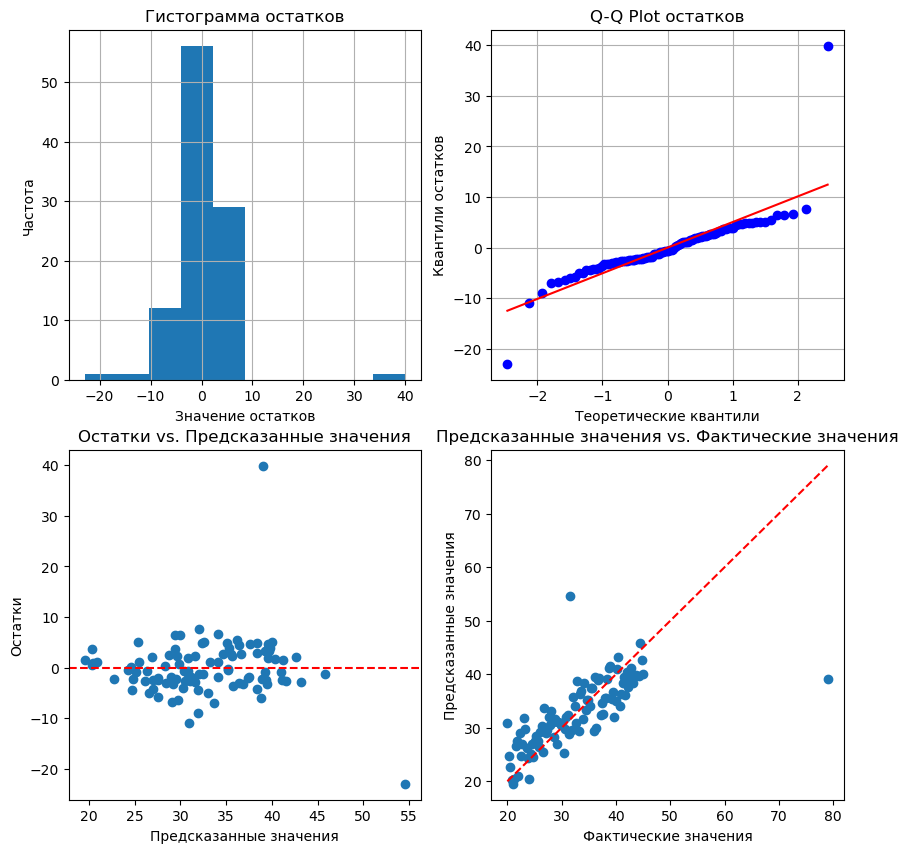

In [5]:
#построим модель
import statsmodels.api as sm

# Получение остатков модели
residuals = y - y_pred

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')

Видим два выброса, которые ломают нам модель. Модель объясняет данные лишь на 53%. Удалим их.

# Удалим выбросы по price

In [6]:
#установим границы для определения выбросов с помощью интерквартильного размаха
total_stat = df.describe() #переменная с данными о статистике
q3 = total_stat['price']['75%'] #3 квантиль
q1 = total_stat['price']['25%'] #1 квантиль

iqr = q3-q1 #межквартальный размах
iqr_min = q1 - 1.5*iqr #нижняя граница выбросов
iqr_max = q3 +1.5*iqr #верхняя граница выбросов

df = df[df['price']<=iqr_max] #новый датасет без выбросов
df

,area,price
0,20.00,6.901191
1,20.25,4.989844
2,20.51,4.392603
3,20.76,3.637801
4,21.01,3.398881
...,...,...
95,79.00,9.427969
96,44.24,9.589689
97,44.49,11.497637
98,44.75,10.510414


# Удалим выбросы по area

In [7]:
#установим границы для определения выбросов с помощью интерквартильного размаха
total_stat = df.describe() #переменная с данными о статистике
q3 = total_stat['area']['75%'] #3 квантиль
q1 = total_stat['area']['25%'] #1 квантиль

iqr = q3-q1 #межквартальный размах
iqr_min = q1 - 1.5*iqr #нижняя граница выбросов
iqr_max = q3 +1.5*iqr #верхняя граница выбросов

df = df[df['area']<=iqr_max] #новый датасет без выбросов
df

,area,price
0,20.00,6.901191
1,20.25,4.989844
2,20.51,4.392603
3,20.76,3.637801
4,21.01,3.398881
...,...,...
94,43.74,9.659112
96,44.24,9.589689
97,44.49,11.497637
98,44.75,10.510414


In [8]:
#зададим переменные
x = df['price']
y = df['area']
kf_corr =  df['area'].corr(df['price'])

#реализуем в sklearn
# преобразуем x  в одномерный массив Numpy, а затем добавим второе измерение
x = np.array(x).reshape(-1, 1)
# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()
# обучим нашу модель
model.fit(x, y)
# напечатаем коэффициенты
print(model.coef_, model.intercept_)

# Рассчитаем прогнозные значение
y_pred = model.predict(x)

[3.48008648] 6.572816077739251


Уравнение регрессии: y = 3,48 * x + 6,57

In [9]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 13.343281955997343
Среднеквадратическая ошибка (RMSE): 3.652845733944611
Средняя абсолютная ошибка (MAE): 3.056849874851086
Средняя абсолютная ошибка  (MAPE): 0.09973648304446263
Коэффициент детерминации (R^2): 0.7474933233653194


C:\Users\mrrr_\AppData\Local\Temp\ipykernel_15316\1400856259.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\mrrr_\AppData\Local\Temp\ipykernel_15316\1400856259.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения vs. Фактические значения')

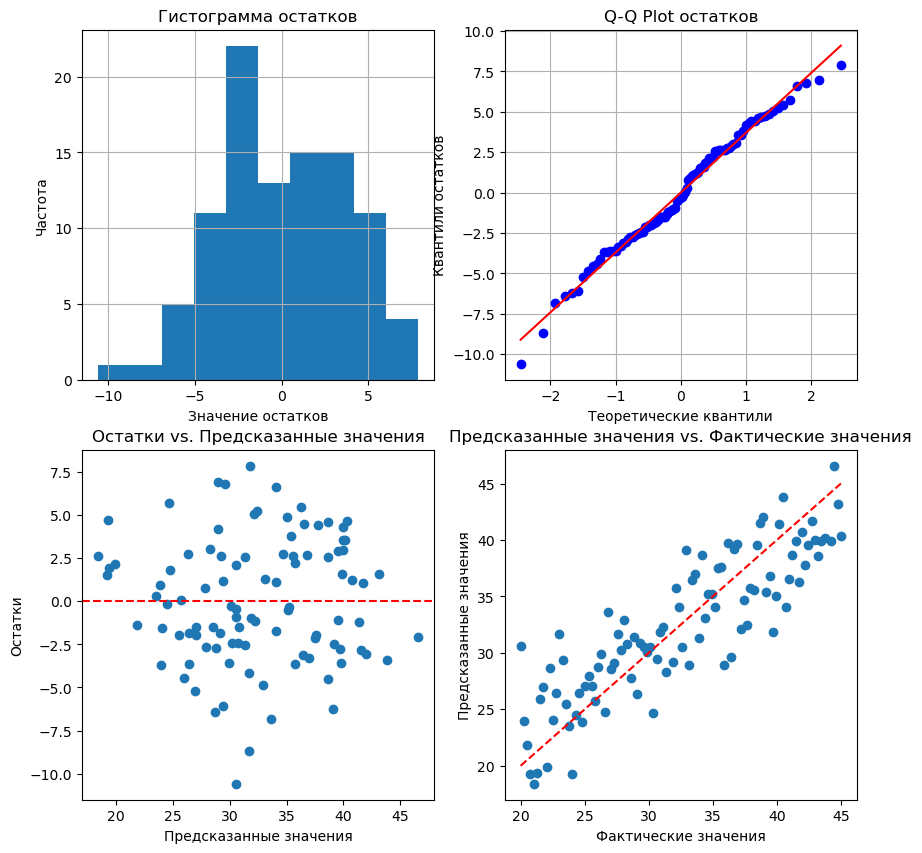

In [10]:
#построим модель
import statsmodels.api as sm

# Получение остатков модели
residuals = y - y_pred

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')

Модель стала лучше, теперь она на 75% объясняет вариацию признака.

# Другой способ(получше)

In [33]:
from sklearn.model_selection import train_test_split

x = df['price']
y = df['area']
kf_corr =  df['price'].corr(df['area'])

#реализуем в sklearn
# преобразуем x  в одномерный массив Numpy, а затем добавим второе измерение
x = np.array(x).reshape(-1, 1)
# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100) 

In [34]:
model.fit(x_train, y_train)
# напечатаем коэффициенты
print(model.coef_, model.intercept_)

[3.4156543] 6.929736288543651


In [35]:
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 9.670601925517417
Среднеквадратическая ошибка (RMSE): 3.1097591426857187
Средняя абсолютная ошибка (MAE): 2.8643342059762054
Средняя абсолютная ошибка  (MAPE): 0.08581105233143496
Коэффициент детерминации (R^2): 0.8195184291727964


C:\Users\mrrr_\AppData\Local\Temp\ipykernel_15316\3357604269.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
C:\Users\mrrr_\AppData\Local\Temp\ipykernel_15316\3357604269.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения vs. Фактические значения')

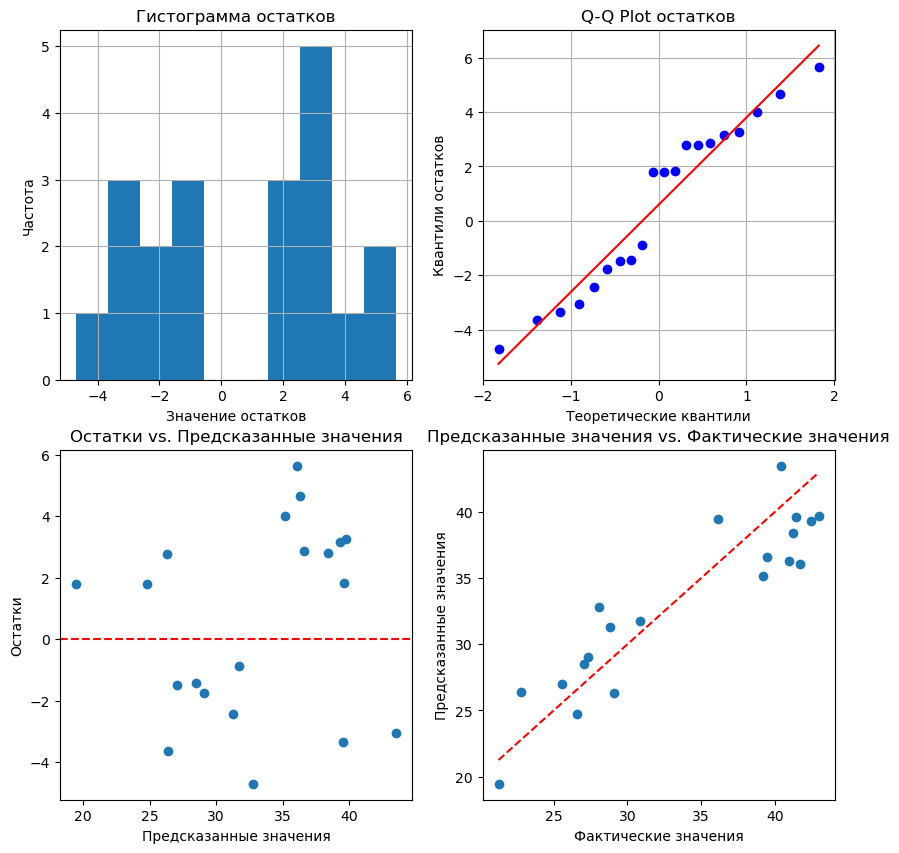

In [37]:
#построим модель
import statsmodels.api as sm

y=y_test
# Получение остатков модели
residuals = y - y_pred

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')

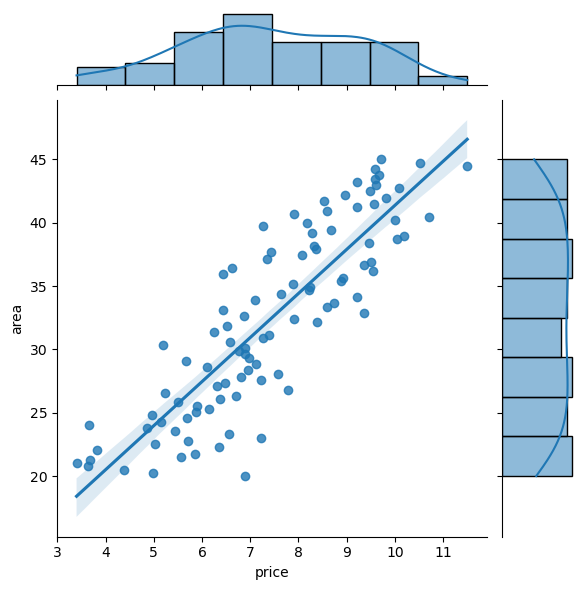

In [38]:
sns.jointplot(data=df, x='price',y='area', kind='reg')